**Deadline for Homework №6:**  
until March 19, 2021, 23:59

**Important:** Maintain individuality when completing your homework. Explain all key points. If plagiarism is detected, a score of 0 points will be assigned to all involved parties.

## **Classification Homework**


1. In the file `train_data.xlsx`, find your dataset according to your variant number (see Homework №2 for your number). Load the data into Jupyter Notebook.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_data = pd.read_excel('train_data_11.xlsx')

In [3]:
train_data

,object,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,target
0,object_1,65,30,45,70,41,54,66,63,62,...,34,52,36,56,65,60,59,60,41,1
1,object_2,60,47,58,46,37,67,51,52,50,...,37,45,48,31,49,60,43,46,42,1
2,object_3,48,50,51,49,42,50,30,53,44,...,45,56,57,44,55,60,32,56,46,1
3,object_4,55,78,53,60,48,56,56,61,58,...,30,62,49,41,22,51,39,39,43,0
4,object_5,50,51,53,38,20,58,32,52,43,...,51,22,42,52,9,45,57,51,55,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,object_996,46,56,37,34,63,45,45,53,41,...,37,51,38,53,57,46,46,52,48,0
996,object_997,61,27,40,54,38,68,63,61,56,...,47,48,46,51,59,42,42,40,55,1
997,object_998,54,47,55,41,10,61,30,52,28,...,37,53,48,49,9,57,47,61,54,0
998,object_999,68,42,49,39,31,51,55,45,45,...,41,48,31,51,51,50,56,51,44,1


2. **Describe your data in Jupyter Notebook (1 point):**  
    * How many objects do you have? How many features? How many classes?  
    * How balanced is your data?  
    * Are there any correlated features?  
    * Provide various statistics.  

In [4]:
train_data.shape # таким образом в датасете 1000 объектов и 
           # 22 признака (24 - целевая перенная - не несущая информации переменная "object")

(1000, 24)

In [5]:
train_data['target'].unique() # всего 2 класса (0 и 1)

array([1, 0])

In [6]:
# удостоверимся в незначительной несбалансированности выборки
print("Нулевой класс:", round(train_data.target.value_counts()[0]*100/train_data.shape[0]), "%")
print("Единичный класс:", round(train_data.target.value_counts()[1]*100/train_data.shape[0]), "%")

Нулевой класс: 61.0 %
Единичный класс: 39.0 %


In [7]:
correlation = train_data.corr(method='pearson')

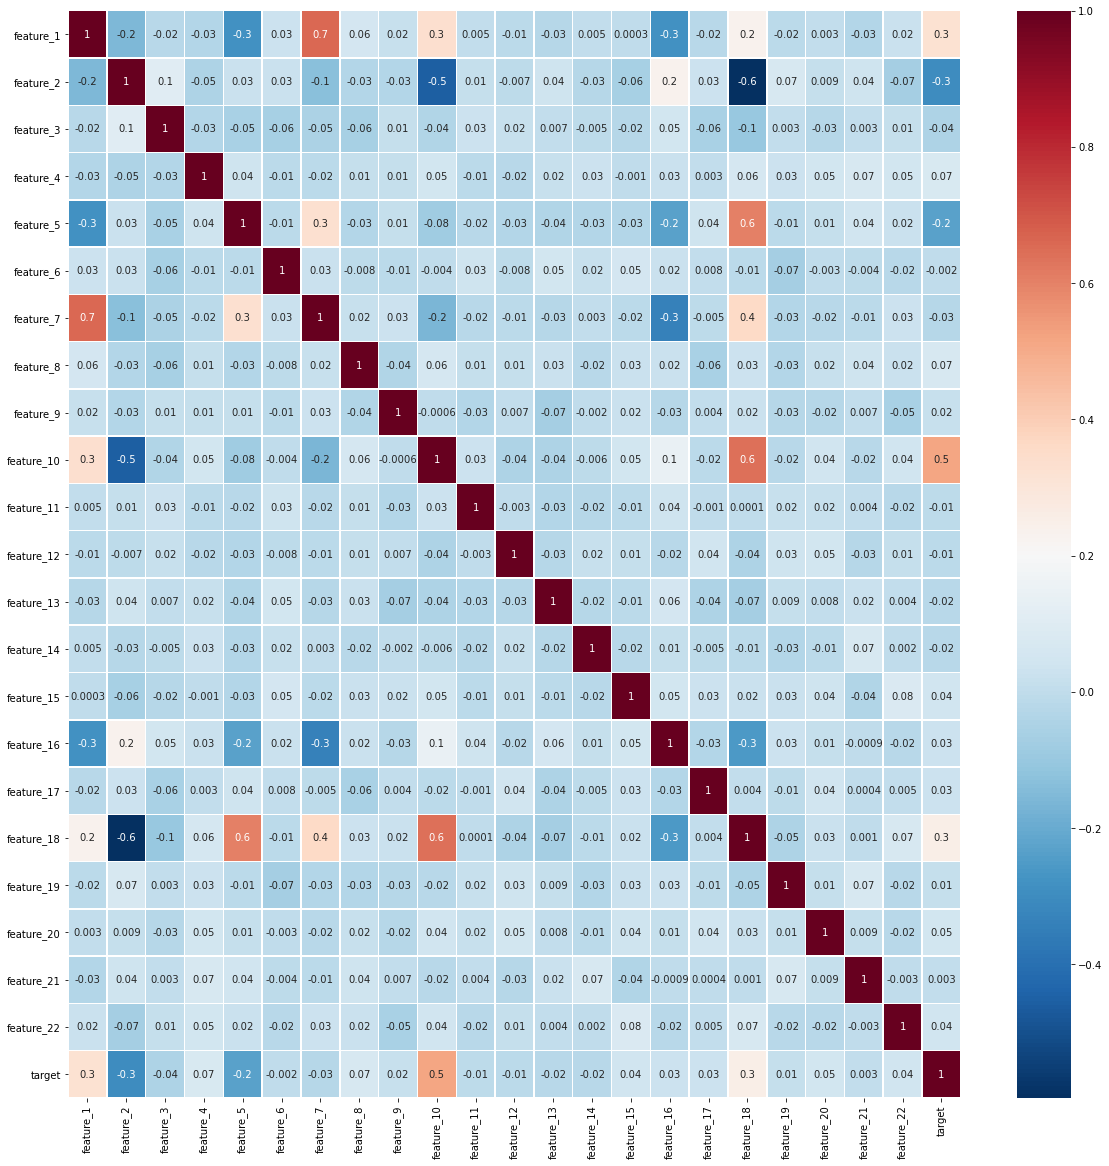

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(20, 20))
sns.heatmap(correlation, 
            xticklabels=correlation.columns,
            yticklabels=correlation.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5,
            fmt='.1g');

We observe that the highest correlation between features, as well as between features and the target variable, is 0.7, meaning that multicollinearity issues should not arise.

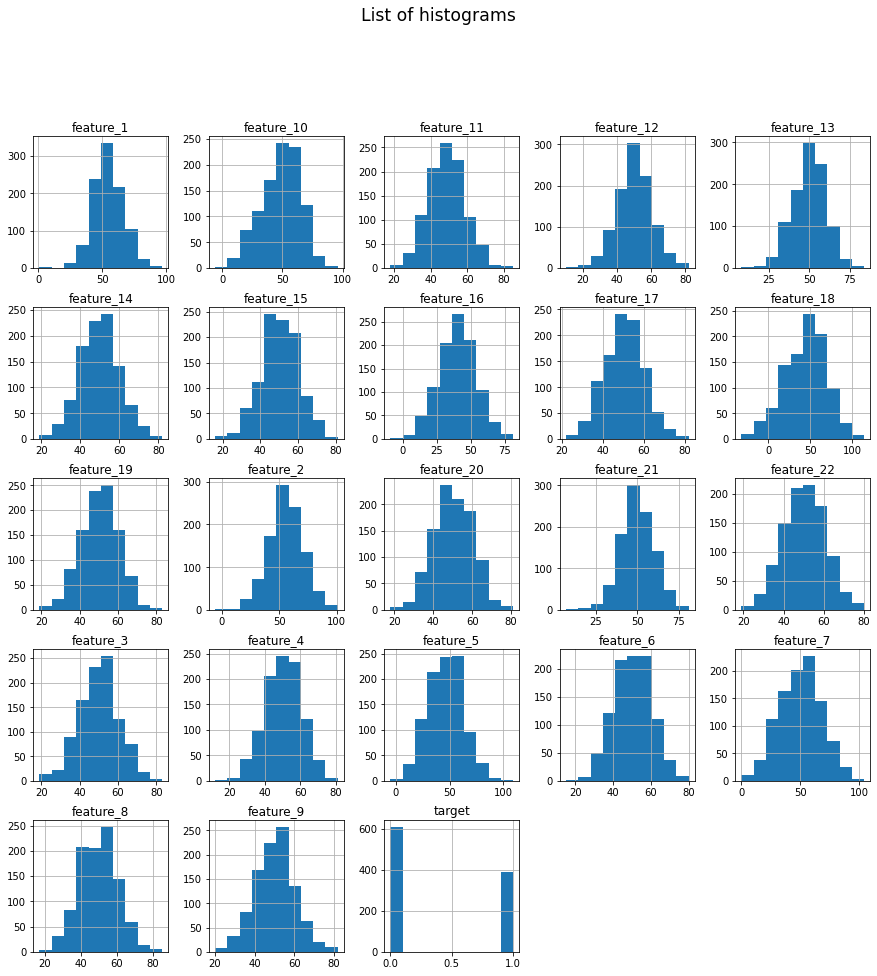

In [9]:
# выведем распределение всех признаков (так, например, видно, что более чем у 300-сот объектов значение первого признака около 50-ти)
fig = plt.figure(figsize = (15,15))
ax = fig.gca() #get current axis
train_data.hist(ax = ax)
plt.suptitle('List of histograms', x=0.5, y=1, ha='center', fontsize='xx-large');

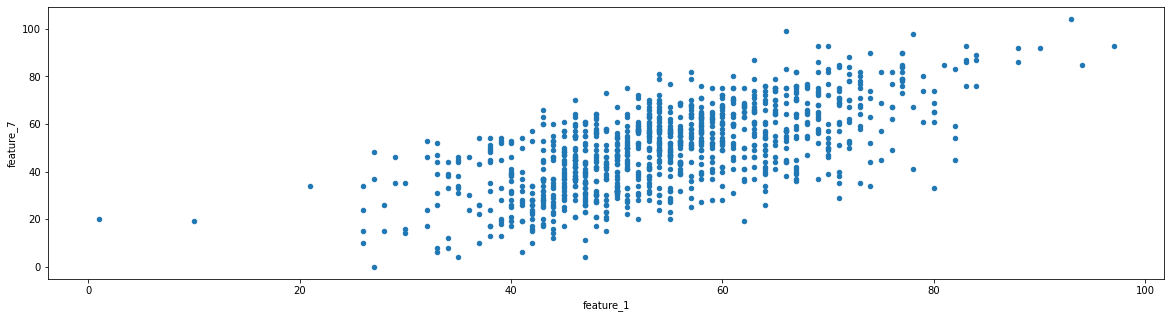

In [10]:
# построим диаграмму рассеяния самых коррелированных признаков (действительно, прослеживается линейная связь между признаками)
fig = plt.figure(figsize = (20,5))
ax = fig.gca()
train_data.plot.scatter(x='feature_1', y='feature_7', ax=ax);

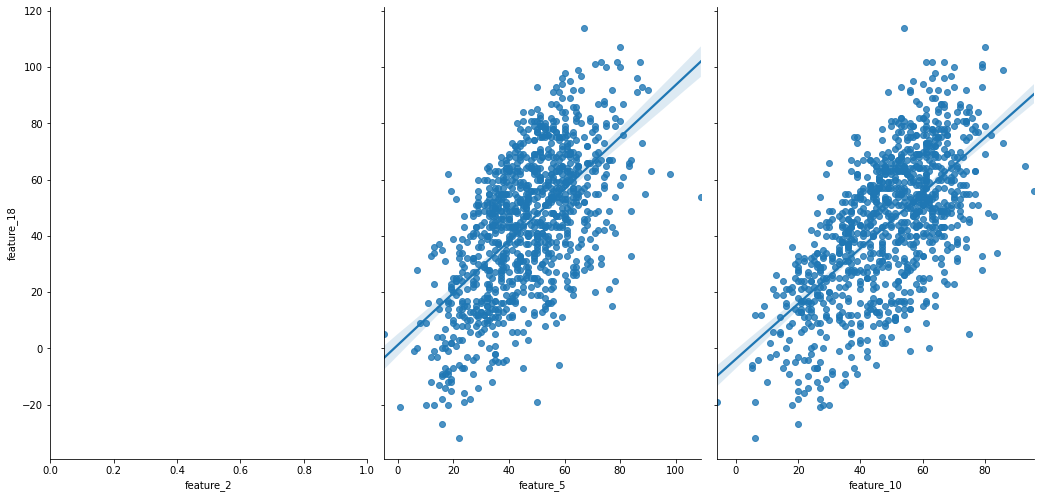

In [11]:
# также изобразим связь между признакими с корреляцией 0.6 (вместе с линией регрессии)
sns.pairplot(train_data, x_vars=['feature_2', 'feature_5', 'feature_10'], y_vars='feature_18', size=7, aspect=0.7, kind='reg');

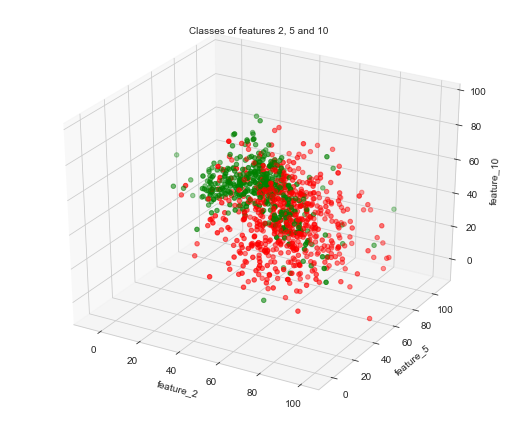

In [12]:
import re, seaborn as sns, numpy as np, pandas as pd, random
from pylab import *
from matplotlib.pyplot import plot, show, draw, figure, cm
from mpl_toolkits.mplot3d import Axes3D

sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(9,7.5))
colors = {0:'red', 1:'green'}
ax = fig.add_subplot(111, projection='3d')
x = train_data['feature_2']
y = train_data['feature_5']
z = train_data['feature_10']

ax.scatter(x, y, z, c=train_data['target'].apply(lambda x: colors[x]))
ax.set_title('Classes of features 2, 5 and 10', fontsize=10)
ax.set_xlabel('feature_2')
ax.set_ylabel('feature_5')
ax.set_zlabel('feature_10')

plt.show()

Thus, based on these features, we can conclude that objects in class 1 predominantly have higher values for the 5th and 10th features and lower values for the 2nd feature.

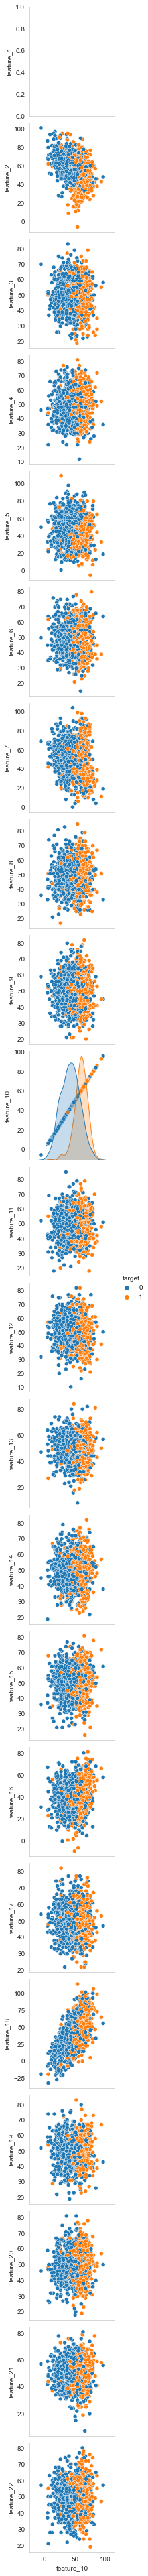

In [13]:
# также изобразим разделение по классам 

# можно при попарном комбинировании признаков (тогда видно, что 10-тый признак самый информативный, так как в 
# соответствующих строке и столбце наблюдается наиболее четкое разделение объектов по классам)
# sns.pairplot(train_data, hue="target"); # 

# однако это строится довольно долго, поэтому построим сразу разделение по классам для 10-го признака
sns.pairplot(train_data, x_vars = 'feature_10', hue='target');

4. **Train various classification models and tune their optimal parameters:**  
    * Logistic Regression (1 point)  
    * kNN (1 point)  
    * Decision Trees (1 point)  
    * Random Forest (1 point)  
    * SVM (1 point)  
    * Neural Networks (1 point)  

In [14]:
import sklearn as sk
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import numpy as np

In [15]:
X_train = train_data.drop(['object', 'target'], axis=1)
y_train = train_data['target']

In [16]:
# отмасштабируем данные
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

In [17]:
cv = KFold(n_splits=4, random_state=10, shuffle=True)

In [18]:
logreg = LogisticRegression(random_state=47)
logreg_fitted = logreg.fit(X_train, y_train)

In [19]:
hyperparams_logreg = {'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100, 200]}
grid_logreg = GridSearchCV(logreg_fitted, hyperparams_logreg, cv=cv, verbose=1, n_jobs=-1)
grid_logreg_fitted = grid_logreg.fit(X_train, y_train)

Fitting 4 folds for each of 12 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    3.8s finished


In [20]:
print(grid_logreg_fitted.best_params_)
print(grid_logreg_fitted.best_score_)

{'C': 100, 'penalty': 'l2'}
0.798


In [21]:
knn = KNeighborsClassifier()
knn_fitted = knn.fit(X_train,y_train)

In [22]:
hyperparams_knn = {'n_neighbors': range(1, 100)}
grid_knn = GridSearchCV(knn_fitted, hyperparams_knn, cv = cv, verbose = 1)
grid_knn_fitted = grid_knn.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 4 folds for each of 99 candidates, totalling 396 fits


[Parallel(n_jobs=1)]: Done 396 out of 396 | elapsed:    6.6s finished


In [23]:
print(grid_knn_fitted.best_params_)
print(grid_knn_fitted.best_score_)

{'n_neighbors': 37}
0.7969999999999999


In [24]:
dtree = DecisionTreeClassifier(random_state=47)
dtree_fitted = dtree.fit(X_train,y_train)

In [25]:
hyperparams_dtree = {'max_depth': range(1, 10), 'min_samples_split': range(1, 10), 'min_samples_leaf': range(1, 10)}
grid_dtree = GridSearchCV(dtree_fitted, hyperparams_dtree, cv = cv, verbose = 1)
grid_dtree_fitted = grid_dtree.fit(X_train, y_train) # займет около 12 секунд

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 4 folds for each of 729 candidates, totalling 2916 fits


[Parallel(n_jobs=1)]: Done 2916 out of 2916 | elapsed:   13.6s finished


In [26]:
print(grid_dtree_fitted.best_params_)
print(grid_dtree_fitted.best_score_)

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.827


In [27]:
forest = RandomForestClassifier(random_state=47)
forest_fitted = forest.fit(X_train, y_train)

In [28]:
# используем случайный поиск, чтобы не пришлось слишком долго ждать 
# да, он будет чуть менее точным из-за неполносты перебора, зато гораздо быстрее
hyperparams_forest = {'n_estimators': [1, 3, 5, 10, 20, 40, 70, 100, 200, 500, 1000], 
                      'max_depth': range(1, 10), 'min_samples_split': range(1, 10), 'min_samples_leaf': range(1, 10)}
random_forest = RandomizedSearchCV(forest_fitted, hyperparams_forest, cv = cv, verbose = 1, random_state=30)
random_forest_fitted = random_forest.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    2.4s finished


In [29]:
print(random_forest_fitted.best_params_)
print(random_forest_fitted.best_score_)

{'n_estimators': 100, 'min_samples_split': 8, 'min_samples_leaf': 6, 'max_depth': 7}
0.833


In [30]:
svm = sk.svm.SVC(random_state=47, kernel='linear')
svm_fitted = svm.fit(X_train, y_train)

In [31]:
hyperparams_svm = {'C': [0.01, 0.1, 1, 10, 100, 200], 'cache_size': range(100, 500, 100), 
                   'shrinking': [True, False], 'decision_function_shape': ['ovr', 'ovo']}
grid_svm = GridSearchCV(svm_fitted, hyperparams_svm, cv = cv, verbose = 1)
grid_svm_fitted = grid_svm.fit(X_train, y_train) # займет около 23 секунд

Fitting 4 folds for each of 96 candidates, totalling 384 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 384 out of 384 | elapsed:   26.1s finished


In [32]:
print(grid_svm_fitted.best_params_)
print(grid_svm_fitted.best_score_)

{'C': 200, 'cache_size': 100, 'decision_function_shape': 'ovr', 'shrinking': True}
0.8009999999999999


In [33]:
nn = MLPClassifier(solver='lbfgs', random_state=47)
nn_fitted = nn.fit(X_train, y_train)

In [34]:
# используем случайный поиск, чтобы не пришлось слишком долго ждать
hyperparams_nn = {'hidden_layer_sizes': range(50, 300, 50), 'activation': ['identity', 'logistic', 'tanh', 'relu'], 
                  'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1], 'learning_rate': ['constant', 'invscaling', 'adaptive']}
random_nn = RandomizedSearchCV(nn_fitted, hyperparams_nn, cv = cv, verbose = 1, random_state=30)
random_nn_fitted = random_nn.fit(X_train, y_train) # займет около 19 секунд

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   23.8s finished


In [35]:
print(random_nn_fitted.best_params_)
print(random_nn_fitted.best_score_)

{'learning_rate': 'adaptive', 'hidden_layer_sizes': 100, 'alpha': 0.001, 'activation': 'identity'}
0.798


5. **Compare these models using various evaluation metrics. Draw a conclusion: which model, in your opinion, classifies the data best? (1 point)**  

We will retrain each model with the best parameters and calculate the areas under the curves (ROC-AUC, PR-AUC).  

In [36]:
grid_logreg_fitted.best_params_

{'C': 100, 'penalty': 'l2'}

In [37]:
logreg = LogisticRegression(C=100, penalty='l2', random_state=47)
logreg_fitted = logreg.fit(X_train, y_train)
precision_logreg = np.mean(cross_val_score(logreg, X_train, y_train, scoring='precision', cv=cv))
recall_logreg = np.mean(cross_val_score(logreg, X_train, y_train, scoring='recall', cv=cv))
f1_score_logreg = np.mean(cross_val_score(logreg, X_train, y_train, scoring='f1', cv=cv))
roc_auc_logreg = np.mean(cross_val_score(logreg, X_train, y_train, scoring='roc_auc', cv=cv))

In [38]:
grid_knn_fitted.best_params_

{'n_neighbors': 37}

In [39]:
knn = KNeighborsClassifier(n_neighbors=37)
knn_fitted = knn.fit(X_train,y_train)
precision_knn = np.mean(cross_val_score(knn, X_train, y_train, scoring='precision', cv=cv))
recall_knn = np.mean(cross_val_score(knn, X_train, y_train, scoring='recall', cv=cv))
f1_score_knn = np.mean(cross_val_score(knn, X_train, y_train, scoring='f1', cv=cv))
roc_auc_knn = np.mean(cross_val_score(knn, X_train, y_train, scoring='roc_auc', cv=cv))

In [40]:
grid_dtree_fitted.best_params_

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [41]:
dtree = DecisionTreeClassifier(max_depth=6, min_samples_leaf=1, min_samples_split=2, random_state=47)
dtree_fitted = dtree.fit(X_train,y_train)
precision_dtree = np.mean(cross_val_score(dtree, X_train, y_train, scoring='precision', cv=cv))
recall_dtree = np.mean(cross_val_score(dtree, X_train, y_train, scoring='recall', cv=cv))
f1_score_dtree = np.mean(cross_val_score(dtree, X_train, y_train, scoring='f1', cv=cv))
roc_auc_dtree = np.mean(cross_val_score(dtree, X_train, y_train, scoring='roc_auc', cv=cv))

In [42]:
random_forest_fitted.best_params_

{'n_estimators': 100,
 'min_samples_split': 8,
 'min_samples_leaf': 6,
 'max_depth': 7}

In [43]:
forest = RandomForestClassifier(n_estimators=100, min_samples_split=8, min_samples_leaf=6, max_depth=7, random_state=47)
forest_fitted = forest.fit(X_train, y_train)
precision_forest = np.mean(cross_val_score(forest, X_train, y_train, scoring='precision', cv=cv))
recall_forest = np.mean(cross_val_score(forest, X_train, y_train, scoring='recall', cv=cv))
f1_score_forest = np.mean(cross_val_score(forest, X_train, y_train, scoring='f1', cv=cv))
roc_auc_forest = np.mean(cross_val_score(forest, X_train, y_train, scoring='roc_auc', cv=cv))

In [44]:
grid_svm_fitted.best_params_

{'C': 200,
 'cache_size': 100,
 'decision_function_shape': 'ovr',
 'shrinking': True}

In [45]:
svm = sk.svm.SVC(C=200, cache_size=100, decision_function_shape='ovr', shrinking=True, random_state=47, kernel='linear')
svm_fitted = svm.fit(X_train, y_train)
precision_svm = np.mean(cross_val_score(svm, X_train, y_train, scoring='precision', cv=cv))
recall_svm = np.mean(cross_val_score(svm, X_train, y_train, scoring='recall', cv=cv))
f1_score_svm = np.mean(cross_val_score(svm, X_train, y_train, scoring='f1', cv=cv))
roc_auc_svm = np.mean(cross_val_score(svm, X_train, y_train, scoring='roc_auc', cv=cv))

In [46]:
random_nn_fitted.best_params_

{'learning_rate': 'adaptive',
 'hidden_layer_sizes': 100,
 'alpha': 0.001,
 'activation': 'identity'}

In [47]:
nn = MLPClassifier(learning_rate='adaptive', hidden_layer_sizes=100, alpha=0.001, activation='identity',
                   solver='lbfgs', random_state=47)
nn_fitted = nn.fit(X_train, y_train)
precision_nn = np.mean(cross_val_score(nn, X_train, y_train, scoring='precision', cv=cv))
recall_nn = np.mean(cross_val_score(nn, X_train, y_train, scoring='recall', cv=cv))
f1_score_nn = np.mean(cross_val_score(nn, X_train, y_train, scoring='f1', cv=cv))
roc_auc_nn = np.mean(cross_val_score(nn, X_train, y_train, scoring='roc_auc', cv=cv))

In [48]:
metrics = [[grid_logreg_fitted.best_score_, precision_logreg, recall_logreg, f1_score_logreg, roc_auc_logreg],
          [grid_knn_fitted.best_score_, precision_knn, recall_knn, f1_score_knn, roc_auc_knn],
          [grid_dtree_fitted.best_score_, precision_dtree, recall_dtree, f1_score_dtree, roc_auc_dtree],
           [random_forest_fitted.best_score_, precision_forest, recall_forest, f1_score_forest, roc_auc_forest],
           [grid_svm_fitted.best_score_, precision_svm, recall_svm, f1_score_svm, roc_auc_svm],
          [random_nn_fitted.best_score_, precision_nn, recall_nn, f1_score_nn, roc_auc_nn]]
metrics_results = pd.DataFrame(data=metrics, 
                  index=["Logistic Regression", "K-Nearest Neighbours", "Decision Tree", "Random Forest",
                        "SVM", "Neural Networks"], 
                  columns=["GridSearchCV best score", 'Precision', 'Recall', 'F1_score', 'ROC-AUC'])

In [49]:
metrics_results

,GridSearchCV best score,Precision,Recall,F1_score,ROC-AUC
Logistic Regression,0.798,0.746300,0.731625,0.737733,0.848201
K-Nearest Neighbours,0.797,0.811539,0.630418,0.707690,0.863849
Decision Tree,0.827,0.777551,0.774940,0.775491,0.809607
Random Forest,0.833,0.807530,0.752685,0.778121,0.887828
SVM,0.801,0.736089,0.766547,0.749367,0.851378
Neural Networks,0.798,0.744566,0.734372,0.738217,0.848319


In [50]:
metrics_results[['GridSearchCV best score', 'F1_score', 'ROC-AUC']].sum(axis=1)

Logistic Regression     2.383934
K-Nearest Neighbours    2.368539
Decision Tree           2.412098
Random Forest           2.498950
SVM                     2.401745
Neural Networks         2.384536
dtype: float64

Thus, in my opinion, the best model is the Random Forest with the following hyperparameters:

In [51]:
random_forest_fitted.best_params_

{'n_estimators': 100,
 'min_samples_split': 8,
 'min_samples_leaf': 6,
 'max_depth': 7}

6. In the file `test_data.xlsx`, find your test dataset. Using the classification model you selected (which you consider the best), predict the classes for the objects in the test set. Save the results in a file in the format "object" - "class". (1 point)

In [52]:
test_data = pd.read_excel('test_data_11.xlsx')
test_data

,object,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22
0,object_1001,63,67,42,55,34,53,44,62,34,...,47,33,54,53,74,38,50,51,44,62
1,object_1002,61,44,48,65,32,65,54,48,49,...,59,44,55,68,51,50,51,45,42,51
2,object_1003,66,85,58,53,73,40,79,40,54,...,52,41,20,19,44,50,57,64,33,56
3,object_1004,60,57,66,53,41,51,44,80,49,...,52,52,49,48,49,52,64,54,61,61
4,object_1005,54,56,58,45,49,49,65,36,37,...,51,40,55,44,46,34,68,40,58,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,object_1096,75,41,50,65,51,52,82,45,54,...,33,55,48,50,50,81,45,39,48,55
96,object_1097,47,66,53,37,73,52,49,51,29,...,48,39,40,39,61,67,61,74,43,53
97,object_1098,42,53,67,55,71,34,62,67,45,...,46,54,44,48,46,55,47,54,39,52
98,object_1099,63,60,60,30,40,53,47,61,58,...,68,69,42,36,50,47,50,46,53,56


In [53]:
forest = RandomForestClassifier(n_estimators=100, min_samples_split=8, min_samples_leaf=6, max_depth=7, random_state=44)
forest_fitted = forest.fit(X_train, y_train)

In [54]:
X_test = test_data.drop(['object'], axis=1)
X_test = scaler.transform(X_test)

In [55]:
X_test.shape

(100, 22)

In [75]:
y_predicted = forest_fitted.predict(X_test)
y_predicted

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0])

In [76]:
y_predicted_df = pd.DataFrame(data=list(y_predicted))

In [77]:
rename_cols = {0: 'prediction'}
y_predicted_df = y_predicted_df.rename(columns=dict(rename_cols))
y_predicted_df

,prediction
0,1
1,1
2,0
3,1
4,0
...,...
95,1
96,0
97,0
98,1


In [78]:
# импорт датафрейма в excel-файл
with pd.ExcelWriter('Predictions.xlsx') as writer:  
    y_predicted_df.to_excel(writer, sheet_name='Predictions')

## **Submission method for Homework №6:**  

You must upload a single zip/rar archive to the "Projects" section in LMS. Do not send the homework via email and/or to the professor’s or assistant’s Telegram.  

The archive containing the completed homework must include 2 files:  
1. Jupyter Notebook (.ipynb)  
2. A file with predicted classes for the test sample (.xlsx/.csv/.txt)